In [6]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# import csv dataset
df = pd.read_csv('HPV_immunization_schedule.csv')

# check the first few rows of the dataset
df.head()

,Entity,Code,Year,Which countries include the human papillomavirus vaccine (HPV) in their national vaccination programs?
0,Afghanistan,AFG,2006,Not routinely administered
1,Afghanistan,AFG,2007,Not routinely administered
2,Afghanistan,AFG,2008,Not routinely administered
3,Afghanistan,AFG,2009,Not routinely administered
4,Afghanistan,AFG,2010,Not routinely administered


In [8]:
# check the shape of the dataset
print(df.shape)
# check the column names
print(df.columns)

(3680, 4)
Index(['Entity', 'Code', 'Year',
       'Which countries include the human papillomavirus vaccine (HPV) in their national vaccination programs?'],
      dtype='object')


In [9]:
# Change the column name "Entity" to "Country"
df.rename(columns={'Entity':'Country', 'Which countries include the human papillomavirus vaccine (HPV) in their national vaccination programs?':'Status for Vaccination'}, inplace=True)

# Display current df
print(df.head(20))

        Country Code  Year      Status for Vaccination
0   Afghanistan  AFG  2006  Not routinely administered
1   Afghanistan  AFG  2007  Not routinely administered
2   Afghanistan  AFG  2008  Not routinely administered
3   Afghanistan  AFG  2009  Not routinely administered
4   Afghanistan  AFG  2010  Not routinely administered
5   Afghanistan  AFG  2011  Not routinely administered
6   Afghanistan  AFG  2012  Not routinely administered
7   Afghanistan  AFG  2013  Not routinely administered
8   Afghanistan  AFG  2014  Not routinely administered
9   Afghanistan  AFG  2015  Not routinely administered
10  Afghanistan  AFG  2016  Not routinely administered
11  Afghanistan  AFG  2017  Not routinely administered
12  Afghanistan  AFG  2018  Not routinely administered
13  Afghanistan  AFG  2019  Not routinely administered
14  Afghanistan  AFG  2020  Not routinely administered
15  Afghanistan  AFG  2021  Not routinely administered
16  Afghanistan  AFG  2022  Not routinely administered
17  Afghan

In [10]:
# Check the unique values for "Status for Vaccination"
print(df['Status for Vaccination'].unique())


['Not routinely administered' 'Entire country' 'Regions of the country'
 'Demonstration projects']


In [11]:
# Find countries that changed from "Not routinely administered" to any other status
# Sort by country and year to track changes over time
df_sorted = df.sort_values(['Country', 'Year'])

# For each country, find the first year where status changed from "Not routinely administered"
countries_with_change = []

for country in df_sorted['Country'].unique():
    country_data = df_sorted[df_sorted['Country'] == country].copy()
    
    # Find the first year where status is NOT "Not routinely administered"
    first_non_admin = country_data[country_data['Status for Vaccination'] != 'Not routinely administered']
    
    if len(first_non_admin) > 0:
        first_change_year = first_non_admin.iloc[0]['Year']
        new_status = first_non_admin.iloc[0]['Status for Vaccination']
        
        countries_with_change.append({
            'Country': country,
            'Code': first_non_admin.iloc[0]['Code'],
            'Year of Change': first_change_year,
            'New Status': new_status
        })

# Convert to DataFrame for easier viewing
countries_changed = pd.DataFrame(countries_with_change)

print(f"Number of countries that changed from 'Not routinely administered' to another status: {len(countries_changed)}")
print("\nCountries with status change and year of change:")
print(countries_changed.head(10))

Number of countries that changed from 'Not routinely administered' to another status: 147

Countries with status change and year of change:
               Country Code  Year of Change              New Status
0              Albania  ALB            2022          Entire country
1              Andorra  AND            2014          Entire country
2  Antigua and Barbuda  ATG            2018          Entire country
3            Argentina  ARG            2011          Entire country
4              Armenia  ARM            2017          Entire country
5            Australia  AUS            2007          Entire country
6              Austria  AUT            2014          Entire country
7              Bahamas  BHS            2015          Entire country
8              Bahrain  BHR            2023          Entire country
9           Bangladesh  BGD            2023  Regions of the country


In [12]:
# Find the countries that changed from "Not routinely administered" to "Entire country" only
countries_changed_to_entire_country = countries_changed[countries_changed['New Status'] == 'Entire country']

print('Number of countries that changed from "Not routinely administered" to "Entire country":', countries_changed_to_entire_country['Country'].nunique())
print(countries_changed_to_entire_country.head(10))

Number of countries that changed from "Not routinely administered" to "Entire country": 132
                Country Code  Year of Change      New Status
0               Albania  ALB            2022  Entire country
1               Andorra  AND            2014  Entire country
2   Antigua and Barbuda  ATG            2018  Entire country
3             Argentina  ARG            2011  Entire country
4               Armenia  ARM            2017  Entire country
5             Australia  AUS            2007  Entire country
6               Austria  AUT            2014  Entire country
7               Bahamas  BHS            2015  Entire country
8               Bahrain  BHR            2023  Entire country
10             Barbados  BRB            2014  Entire country


            Country Code  Year of Change      New Status
45           France  FRA            2006  Entire country
141   United States  USA            2006  Entire country
130     Switzerland  CHE            2006  Entire country
85           Monaco  MCO            2006  Entire country
5         Australia  AUS            2007  Entire country
48          Germany  DEU            2007  Entire country
33          Denmark  DNK            2007  Entire country
126           Spain  ESP            2007  Entire country
140  United Kingdom  GBR            2008  Entire country
105        Portugal  PRT            2008  Entire country


/var/folders/tj/f3l3_hgj4wng8cx7x4cwjzzc0000gn/T/ipykernel_1880/819715395.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_changed_to_entire_country.sort_values(['Year of Change'], inplace=True, ascending=True)


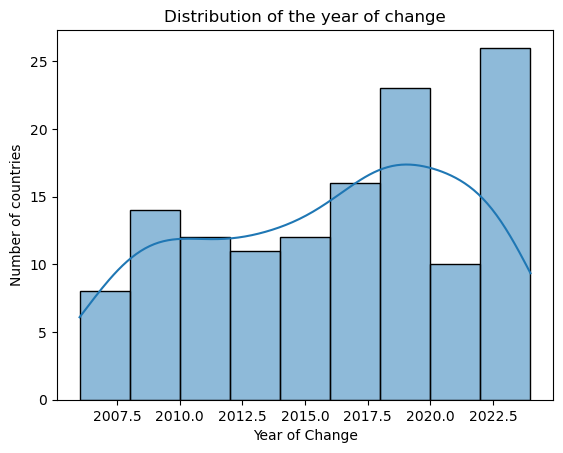

In [13]:
# Sort the countries that changed from "Not routinely administered" to "Entire country" by the year of status change
countries_changed_to_entire_country.sort_values(['Year of Change'], inplace=True, ascending=True)
print(countries_changed_to_entire_country.head(10))

# Display distrbution of the year of change
sns.histplot(countries_changed_to_entire_country['Year of Change'], kde=True)
plt.title('Distribution of the year of change')
plt.xlabel('Year of Change')
plt.ylabel('Number of countries')
plt.show()


In [14]:
# Filter "Year of Change" ranges from 2006 to 2014 only
''' Since we only have cancer cases data from 2006 to 2017, we only include the countries
that changed their HPV vaccination policy from 2006 to 2014 to see if there is a correlation
between the change of HPV vaccination policy and the number of HPV-related cancers. '''

countries_changed_to_entire_country = countries_changed_to_entire_country[countries_changed_to_entire_country['Year of Change'].isin(range(2006, 2014))]
print('Number of countries that changed from "Not routinely administered" to "Entire country" in the year range of 2006 to 2014:', countries_changed_to_entire_country['Country'].nunique())
print(countries_changed_to_entire_country.head(20))


Number of countries that changed from "Not routinely administered" to "Entire country" in the year range of 2006 to 2014: 45
              Country Code  Year of Change      New Status
45             France  FRA            2006  Entire country
141     United States  USA            2006  Entire country
130       Switzerland  CHE            2006  Entire country
85             Monaco  MCO            2006  Entire country
5           Australia  AUS            2007  Entire country
48            Germany  DEU            2007  Entire country
33            Denmark  DNK            2007  Entire country
126             Spain  ESP            2007  Entire country
140    United Kingdom  GBR            2008  Entire country
105          Portugal  PRT            2008  Entire country
100            Panama  PAN            2008  Entire country
99              Palau  PLW            2008  Entire country
113        San Marino  SMR            2008  Entire country
73         Luxembourg  LUX            2008  Entir

In [17]:
# Make sure to run cells 1-8 before running this cell!

# Print out the top 8 countries that changed from "Not routinely administered" to "Entire country" in the year range of 2006 to 2014
print(countries_changed_to_entire_country.head(8))

# Make the result the first 8 rows to replace the previous one
countries_changed_to_entire_country = countries_changed_to_entire_country.head(8)

# Download the final df into a csv file
countries_changed_to_entire_country.to_csv('First 8 countries_changed_to_national_coverage.csv', index=False)



           Country Code  Year of Change      New Status
45          France  FRA            2006  Entire country
141  United States  USA            2006  Entire country
130    Switzerland  CHE            2006  Entire country
85          Monaco  MCO            2006  Entire country
5        Australia  AUS            2007  Entire country
48         Germany  DEU            2007  Entire country
33         Denmark  DNK            2007  Entire country
126          Spain  ESP            2007  Entire country


# Conclusion
We identified the first 8 countries which shifted from "Not routinely administered" to "Entire country" between 2006 to 2007. These are pilot countries doing the HPV vaccinations into public health or said nationally covered. Let's look at whether the policy affected vaccination rate (%) and cervical cancer cases since then. 